In [188]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [210]:
# Load the dataset and perform the following operations to viaualize data and explain your insights in one sentence.
'''
Observations:
    After initially loading the dataset, I perform a few functions to view its structure and values to get a better idea 
    of what I was working with.
    The data table contains 10 columns of data which correspond to qualitative and quantitative characteristics
    of each passenger aboard the Titanic at the time of its sinking. The data types range from strings to numerical and boolean.
    The types of information themselves are related to social hierarchy, personal traits, familial/companionship ties,
    travel details.
'''
df = pd.read_csv('Titanic.csv')
print(df.info())
print(df.describe())
print(df.head(15))
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   sibsp     891 non-null    int64  
 3   parch     891 non-null    int64  
 4   fare      891 non-null    float64
 5   embarked  889 non-null    object 
 6   class     891 non-null    object 
 7   who       891 non-null    object 
 8   alone     891 non-null    bool   
 9   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 63.6+ KB
None
              age       sibsp       parch        fare    survived
count  714.000000  891.000000  891.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594   32.204208    0.383838
std     14.526497    1.102743    0.806057   49.693429    0.486592
min      0.420000    0.000000    0.000000    0.000000    0.000000
25%     20.125000   

sex           2
age          88
sibsp         7
parch         7
fare        248
embarked      3
class         3
who           3
alone         2
survived      2
dtype: int64

class   survived
First   1           136
        0            80
Second  0            97
        1            87
Third   0           372
        1           119
Name: count, dtype: int64

class
Third     491
First     216
Second    184
Name: count, dtype: int64

class   survived
First   1           136
Second  1            87
Third   1           119
Name: count, dtype: int64



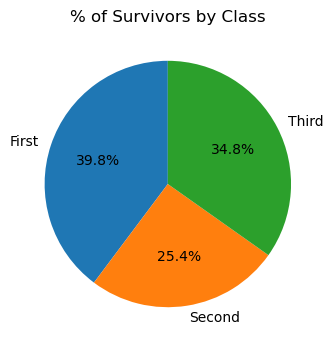

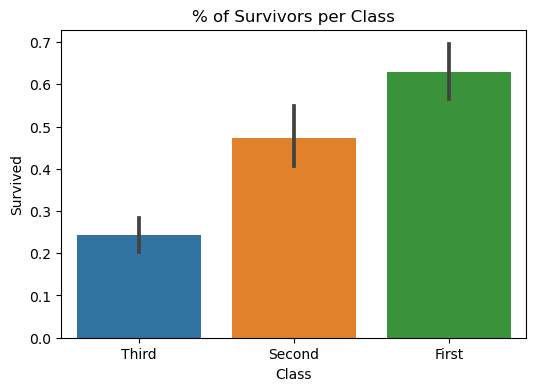

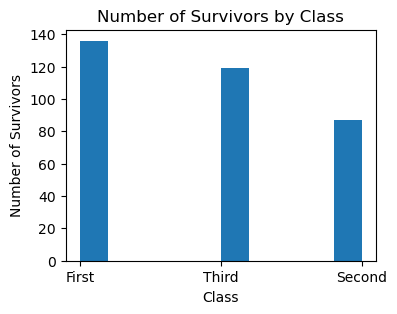

'\nObservations:\n    From the pie chart of percent survivors by class, it appears that the split between survivors based on class is relatively\n    even with a range of 5-15% difference between each of the classes. So solely based on the total population of the survivor group\n    I would say there was a good, even split with a slight favor towards first and third class passengers.\n    However, each class itself is dramatically different in terms of population size. Basing survival rate off of individual class\n    population size, there is a significant difference. First class passengers had a 60% chance of survival,\n    whereas third class passengers had a 25% chance, when compared to individuals within their own class. In conclusion,\n    the higher class passengers did have a higher chance of survival.\n'

In [213]:
# Visualize the survival rate of passengers based on their ticket class (1st, 2nd, or 3rd class). 
# Were the passengers in higher classes more likely to survive?

# View the number of survivors and non-survivors of each class
print(df.groupby('class')['survived'].value_counts(), end='\n\n')

# Get the total population of each class
print(df['class'].value_counts(), end='\n\n')

# View only the surivors of each class (for ease of review and referral)
svr_df = df[df['survived'] == 1]
print(svr_df.groupby('class')['survived'].value_counts(), end='\n\n')

# determine the percentage of surivors by dividing the total number of survivors by the total population size
svr_by_class = df.groupby('class')['survived'].sum()
ttl_svr = svr_by_class.sum()
pct_svr = (svr_by_class / ttl_svr) * 100

# create a pie chart to view the percentages of each class of survivors
plt.figure(figsize=[6, 4])
plt.pie(pct_svr, labels=pct_svr.index, autopct='%1.1f%%', startangle=90)
plt.title('% of Survivors by Class')
plt.show()

# create a barplot to view the percentage of survivors within each class
plt.figure(figsize=[6, 4])
sns.barplot(data=df, x='class', y='survived', order=['Third', 'Second', 'First'])
plt.xlabel('Class'), plt.ylabel('Survived')
plt.title('% of Survivors per Class')
plt.show()

# create a histogram to view the total number of survivors in each class
plt.figure(figsize=[4, 3])
plt.hist(data=svr_df, x='class')
plt.xlabel('Class'), plt.ylabel('Number of Survivors')
plt.title('Number of Survivors by Class')
plt.show()

'''
Observations:
    From the pie chart of percent survivors by class, it appears that the split between survivors based on class is relatively
    even with a range of 5-15% difference between each of the classes. So solely based on the total population of the survivor group
    I would say there was a good, even split with a slight favor towards first and third class passengers.
    However, each class itself is dramatically different in terms of population size. Basing survival rate off of individual class
    population size, there is a significant difference. First class passengers had a 60% chance of survival,
    whereas third class passengers had a 25% chance, when compared to individuals within their own class. In conclusion,
    the higher class passengers did have a higher chance of survival.
'''

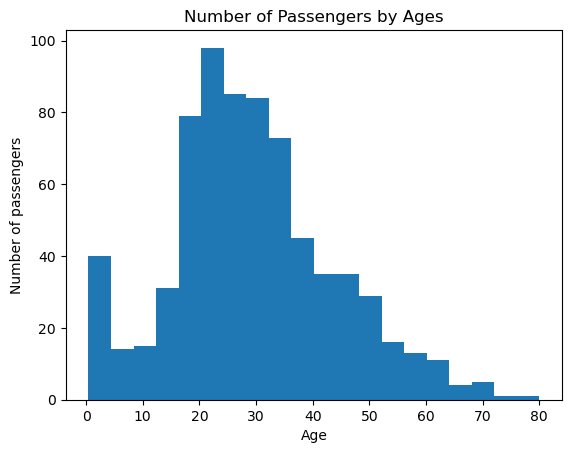

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64 28.0 0    24.0
Name: age, dtype: float64


'\nObservations:\n    The histogram shows a normal distribution with a slight right skew with a mean, median, mode of appr. 30, 28, 24,\n    and a standard deviation of 14.5. There are also a significant number of passengers aged less than 5 years old which drops \n    the mean lowe.\n    Range: 0.42 - 80 yr.\n'

In [216]:
# Create a histogram to visualize the distribution of passenger ages.
# What is the age distribution like on the Titanic?

# create a histogram to view the distribution of passengers' age - split into 20 even groups (bins) for better fit
plt.hist(data=df, x='age', bins=20)
plt.xlabel('Age'), plt.ylabel('Number of passengers')
plt.title('Number of Passengers by Ages')
plt.show()
print(df['age'].describe(), df['age'].median(), df['age'].mode())
'''
Observations:
    The histogram shows a normal distribution with a slight right skew with a mean, median, mode of appr. 30, 28, 24,
    and a standard deviation of 14.5. There are also a significant number of passengers aged less than 5 years old which drops 
    the mean lowe.
    Range: 0.42 - 80 yr.
'''

survived  sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

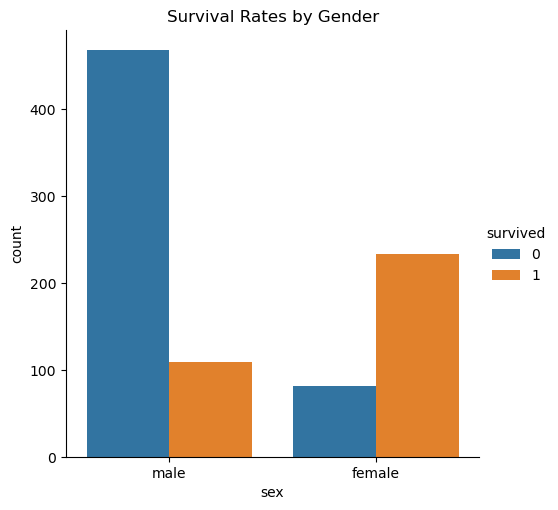

In [192]:
# Generate a bar chart to compare the survival rates of male and female passengers. 
# Did gender play a role in survival?

# change the survived column to string type so it can be used within the legend
df['survived'] = df['survived'].astype(str)
# create a plot to view the number of male and female survivors and non-survivors color-coded by survival status
sns.catplot(data=df, x='sex', hue='survived', kind='count')
plt.title('Survival Rates by Gender')
# view the gender survival summations in table form
df.groupby('survived')['sex'].value_counts()
'''
Observations:
    This graph is pretty clear that the likelihood of survival was higher for females.
'''

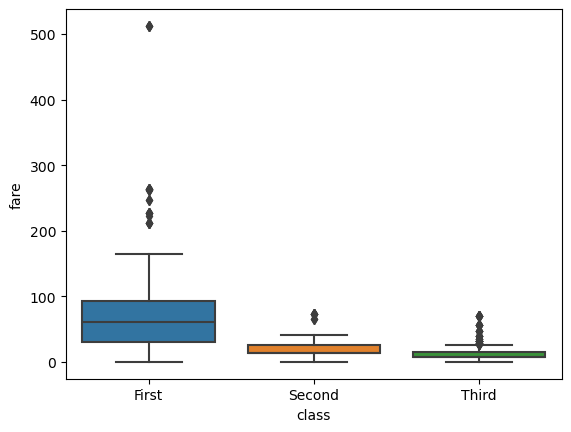

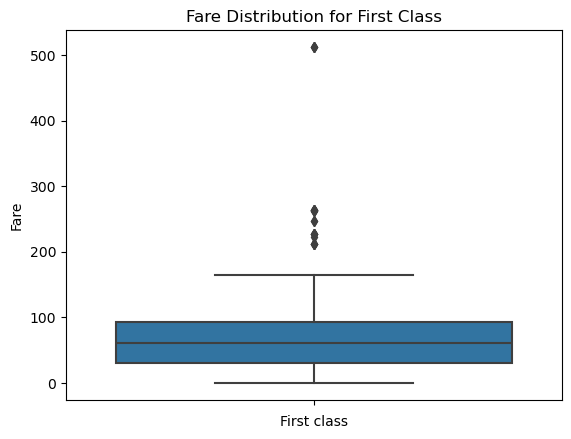

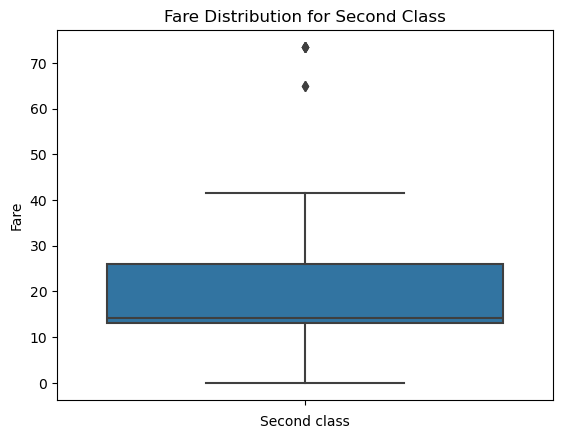

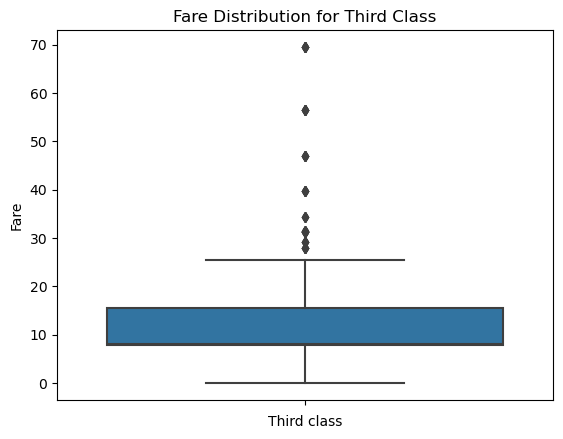

In [193]:
# Visualize the distribution of ticket fares for each passenger class using box plots. 
# How did ticket fares vary across different classes?

# create a box plot to view each classes range and mean of fares for side by side comparison, order the x-axis by class 
sns.boxplot(data=df, x='class', y='fare', order=['First', 'Second', 'Third'])
plt.show()

# create an iterable to produce a box plot for each individual class to more view a more clearly defined distribution 
for cls in ['First', 'Second', 'Third']:
    class_df = df[df['class'] == cls]
    sns.boxplot(data=class_df, y='fare')
    plt.xlabel(f'{cls} class'), plt.ylabel('Fare')
    plt.title(f'Fare Distribution for {cls} Class')
    plt.show()
'''
Observations:
    The First class fare distribution shows the highest mean and median fare as well as the widest range, there are also
    a couple of outliers that are affecting the mean value. The Second class fare had a lower mean with only a couple
    outliers. The Third class fares were also showed a fairly decent sized spread, but the mean remained among the lowest.
    I first viewed each class side by side for comparison, then created plots for each individual class to better view their distributions. 
'''

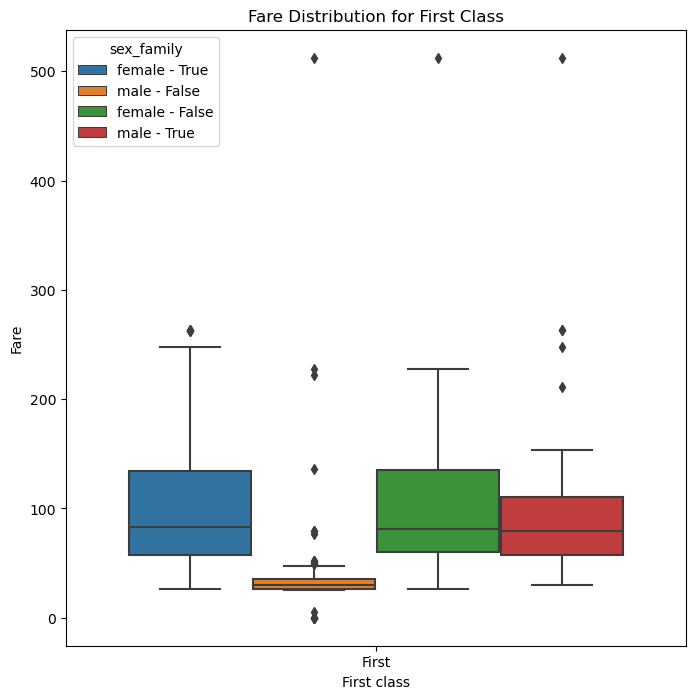

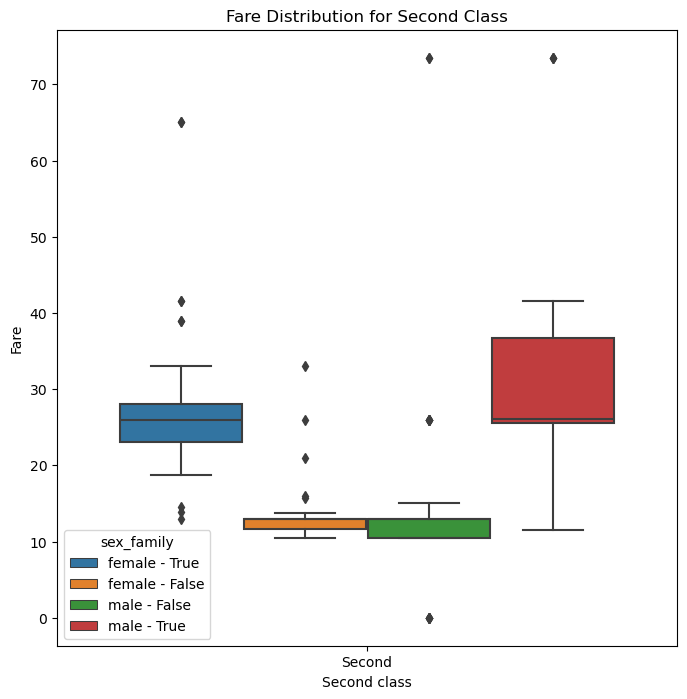

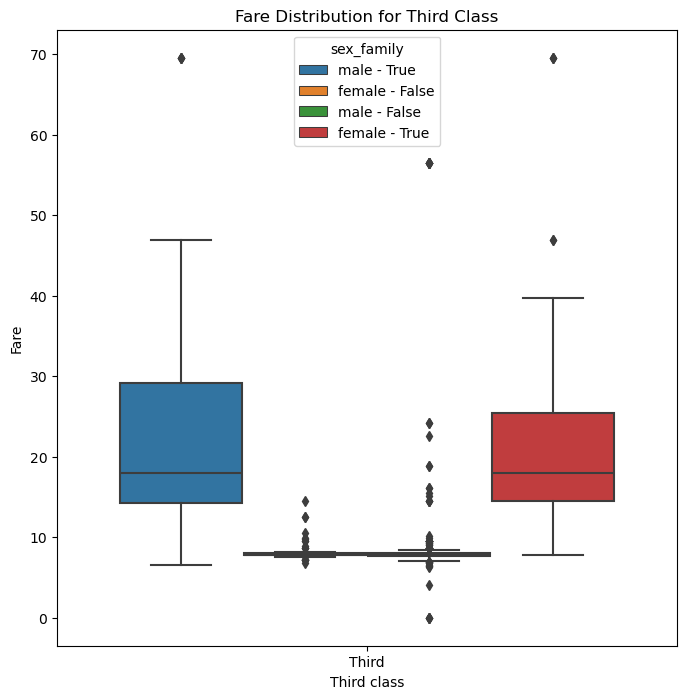

In [194]:
# Create new columns to denote whether or not a passenger had any siblings, parents, children, or a spouse
df['has_family'] = (df['sibsp'] > 0) | (df['parch'] > 0)
# create another column to combine the sex and truthiness of possessing family members for the legend of the boxplot
df['sex_family'] = df['sex'] + ' - ' + df['has_family'].astype(str)

# Similarly as before, create a boxplot for each class displaying the distribution of fares 
# for those groups of individuals that are male or female, and with or without family members
for cls in ['First', 'Second', 'Third']:
    plt.figure(figsize=[8, 8])
    class_df = df[df['class'] == cls]
    sns.boxplot(data=class_df, x='class', y='fare', hue='sex_family')
    plt.xlabel(f'{cls} class'), plt.ylabel('Fare')
    plt.title(f'Fare Distribution for {cls} Class')
    plt.show()

'''
Observations:
    Out of curiousity, I wanted to try and discern what was causing the larger spreads and what was driving the mean values, so I went ahead and 
    also created views of each class grouped by sex and family attendance. My theory was that those with families would be paying the higher fare 
    prices, and that males in particular would be bearing the brunt of the costs in general. I believe that theory 
    held partially true as the fares of those with family members aboard had larger ranges and higher mean values yet the distribution of fares
    was nearly equal between male and female, but single males actually had the lowest fairs, and single women were noticably higher
    - particularly those in the first class category. 
'''

C:\Users\ephar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ephar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


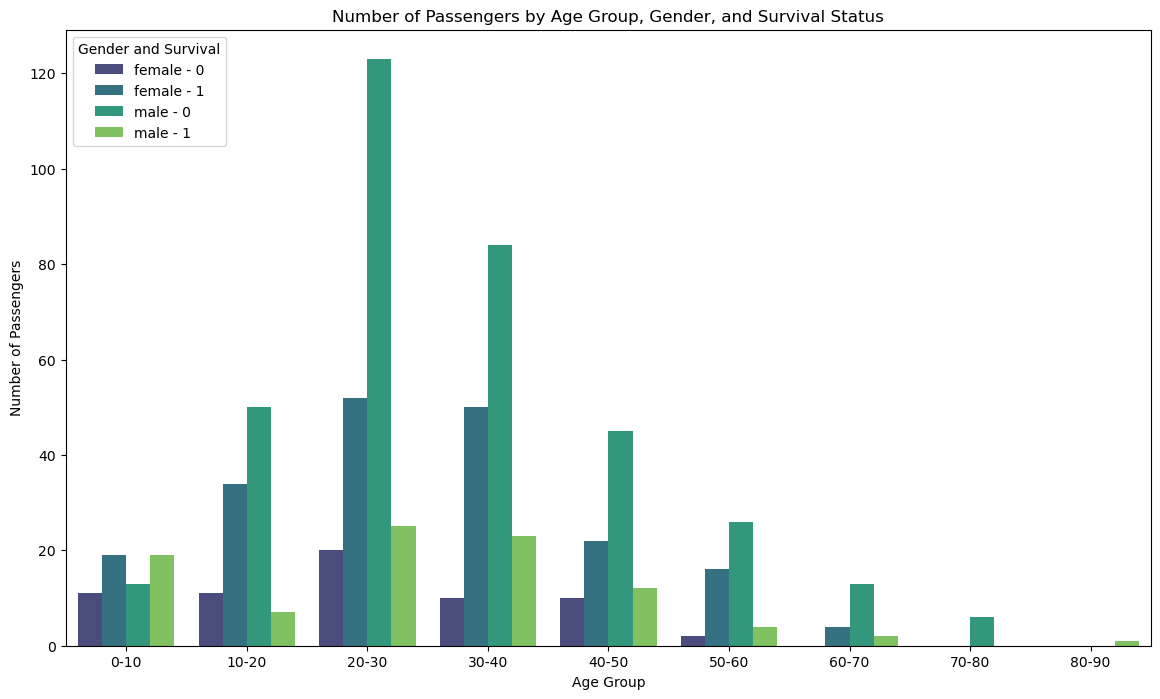

'\nObservations:\n    Females between the ages of 10-40 had the highest rate of survival. Males less than 10 years of age were the only male age group \n    to have a greater than 50% chance of survival. Females in general were more likely to survive than their male counterparts in each age group. \n'

In [217]:
# Create a grouped bar chart to visualize the survival rates of passengers across different age groups and genders. 
# Were certain age groups or genders more likely to survive?

# create the age bins and labels in which each passenger will be placed
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
# create a column to denote each passengers age group
# take the age of the passenger, determine the highest most bin number it is below, and supply the value of the associated bin label 
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
# create a column combining the sex and survival status of each passenger for the plot's legend
df['sex_svr'] = df['sex'] + ' - ' + df['survived'].astype(str)
# group passengers by age_group and survival status/sex, get the number passengers in each group of these groups, 
# and make it into a dataframe by resetting the index of the view and converting the summations index to a column named 'count'
grouped = df.groupby(['age_group', 'sex_svr'], observed=True).size().reset_index(name='count')

# create a plot using the previously generated dataframe, use the age groups as the x-axis, the total number of passengers in each group as the y-axis,
# set the hue to properly differentiate the bars by survival status, and pick a visually appealing color palette for discernment 
plt.figure(figsize=[14, 8])
sns.barplot(data=grouped, x='age_group', y='count', hue='sex_svr', palette='viridis')
plt.xlabel('Age Group'), plt.ylabel('Number of Passengers')
plt.title('Number of Passengers by Age Group, Gender, and Survival Status')
plt.legend(title='Gender and Survival')
plt.show()

'''
Observations:
    Females between the ages of 10-40 had the highest rate of survival. Males less than 10 years of age were the only male age group 
    to have a greater than 50% chance of survival. Females in general were more likely to survive than their male counterparts in each age group. 
'''